# Memoization & Dynamic Programming 

### Topics to discuss today:

<ul>
    <li>Time and Space Complexity  of recursive fibonnaci</li>
    <li>The fibonacci Tree</li>
    <li>storing solutions to sub problems</li>
    <li>solving popular problems</li>
</ul>
<br><br><br><br>

### The Fibonacci sequence

In [1]:
# Write out a function to find the nth number in the fibonnaci sequence
def fib(n):
    if n <= 2:
        return 1
    else:
        return fib(n-1) + fib(n-2) # two calls every time. 

fib(7)

13

In [4]:
# Dealing with time space and recursion

def dib(n):
    print(n)
    if n <= 1:
        return 1
    else:
        return dib(n-1) # Extra call on the stack O(n) time
    
dib(10)

10
9
8
7
6
5
4
3
2
1


1

Calculating the time space complexity of the Fibbonacci sequence


## Trees

the fibonacci sequence can be visualized using a tree structure. Lets look at the elements of a tree before discussing the fibonnaci tree:

<img src="https://www.tutorialspoint.com/data_structures_algorithms/images/binary_tree.jpg" style="height:400px;">

Let's look at the fibonnaci tree:

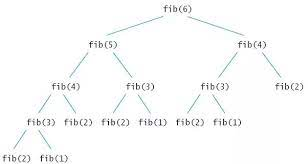

## Memoization

#### What is it?

In computing, memoization or memoisation is an optimization technique used primarily to speed up computer programs by storing the results of expensive function calls and returning the cached result when the same inputs occur again. Memoization has also been used in other contexts (and for purposes other than speed gains), such as in simple mutually recursive descent parsing.

#### When should we use it?

Some problems are largely made of <b>overlapping subproblems</b>. When we find our code is solving the same problem multiple times over it's a good idea to store them so we don't have to recompute those solutions. This is known as Dynamic Programming 

In [16]:
# Linear Time & Space O(n)

def fib (n, memo = {}):
    if n in memo:
        return memo[n]
    if n <= 2: 
        return 1
    else:
        memo[n] = fib(n-1) + fib (n-2)
        return memo[n]
    
fib(6)  # happens much quicker now that we're memorizing similar fib levels

8

In [42]:
# iterative fibbonacci sequence (bottom up approach): going from lowest to highest number. 
# fib number is made up of previous two numbers
# Linear Time O(n) & Constant Space O(1) 

def fib_i(n):
    if n <= 2: 
        return 1
    else: 
        memo = [1, 1] # fib(1) and fib(2), which is also 1 (or aka value of fib(3))
        for i in range(3, n): # fib(3):
            num = memo[0] + memo[1] 
            memo.append(num)
            del memo[0]
        return sum(memo)
    
fib_i(50)

12586269025

## Decorators
A decorator in Python is a function that takes another function as an argument, and returns a 3rd functiton. Decorators are extremely useful, as they allow the extension of an existing function, without any modification of the original function source code. 

In [24]:
# takes the function and changes it
def print_hello():
    return "Hello from CT."

def uppercase_decorator(function):
    def wrapper(): # ultimately the function that we return
        func = function()
        make_uppercase = func.upper() + "Something else"
        return make_uppercase
    return wrapper

returned_func = uppercase_decorator(print_hello)
returned_func()

'HELLO FROM CT.Something else'

In [25]:
## Decorator Synthax
@uppercase_decorator # from box above
def say_hello():
    return "Hi there."

say_hello()


'HI THERE.Something else'

## TwoSum Problem

Given an array of integers, return the two numbers such that they add up to a specific target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

In [29]:
# array = [1,3,9,10,6,5]
# target = 10
# def two_number_sum(array, target):
#     for num in array:
#         next_num = array.index(num + array.index(num+1))
#         sum_of_nums = int(array.index(num)) + int(array.index(num + next_num))
#         if sum_of_nums == target:
#             return sum_of_nums
#     else:
#         return 

# two_number_sum(array,target)
        
        

array = [1,3,7,10,6,5]
target = 10

def two_number_sum(array, target):
    results = []
    for i in range(len(array)):
        if array[i] != target:
            for nums in array:
                if array[i] + nums == target:
                    results.append(array[i])
                    results.append(nums)
    return results[0:2]


two_number_sum(array, 10)
        
    


[3, 7]

In [40]:
# Naive solution Quadratic Time O(n^2) Constant Space O(1)
# aka this solution is better for space
array = [5,1,3,5,10,6]
print(sorted(array))
target = 10


def two_number_sum(array, target):
    for x in range(len(array)):
        for i in range(len(array)):
            if x != i and array[x] + array[i] == target:
                    return  (array[x],array[i])
                
two_number_sum(array,target)

[1, 3, 5, 5, 6, 10]


(5, 5)

In [35]:
array = [1,3,9,10,6,5]
target = 10
def two_number_sum(array, target):
    d = {}
    for first_num in range(len(array)): # O(n)
        second_num = target - array[first_num] # O(1)
        if array[first_num] == second_num: # O(1)
            continue
        if second_num in d:
            return array[first_num],second_num # O(1)
        else:
            d[array[first_num]] = first_num # O(1)
    
    
two_number_sum(array,target)

(9, 1)

In [ ]:
# two lists are two linear. so a dictionary with two key,value pairs isn't necessarily saving more space compared to two lists


In [41]:
# dictionary approach Linear Time O(n) & Linear Space O(n)
# aka this solution is better for time 

# pointers Constant space O(1) Linear Logarithmic Time O(n log(n))
# methods in lin log time: sort. for example. 

def twoSumPointer(array, target):
    array.sort() # O(n log(n))
    left = 0
    right = len(array) - 1
    while left < right:
        if array[left] + array[right] == target:
            return array[left], array[right]
        elif array[left] + array[right] > target:
            right -= 1
            
        else: 
            left += 1
            
    
twoSumPointer(array,target)

(5, 5)